# Import Libraries

In [2]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Data & View Basics

In [3]:
credit = pd.read_csv('credit.csv', skiprows=0)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [11]:
credit.info(verbose=False, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 25 entries, ID to default payment next month
dtypes: float64(1), int64(21), object(3)
memory usage: 5.7+ MB


In [12]:
credit.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [27]:
credit['SEX'].value_counts()

female    18112
male      11888
X2            1
Name: SEX, dtype: int64

In [28]:
credit['MARRIAGE'].value_counts()

2     15964
1     13659
3       323
0        54
X4        1
Name: MARRIAGE, dtype: int64

In [29]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Data Cleaning

In [30]:
#Drop Duplicates
credit=credit.drop_duplicates()
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30001 non-null  object 
 2   SEX                         30001 non-null  object 
 3   EDUCATION                   30001 non-null  object 
 4   MARRIAGE                    30001 non-null  object 
 5   AGE                         30001 non-null  object 
 6   PAY_0                       30001 non-null  object 
 7   PAY_2                       30001 non-null  object 
 8   PAY_3                       30001 non-null  object 
 9   PAY_4                       30001 non-null  object 
 10  PAY_5                       30001 non-null  object 
 11  PAY_6                       30001 non-null  object 
 12  BILL_AMT1                   30001 non-null  object 
 13  BILL_AMT2                   300

In [31]:
#Check for Null
print(credit.isnull().sum())

ID                            1
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
#We know there is a Null somewhere in the dataset. This function helps us find it:
credit[credit['ID']].isnull().index.tolist()

In [33]:
#Print Index 201 to double check:
print(credit.loc[200:208,:])

        ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3  \
200  201.0    180000  female  graduate school        1  38    -2    -2    -2   
201    NaN        X1      X2               X3       X4  X5    X6    X7    X8   
202  202.0    140000    male  graduate school        2  31     0     0     2   
203  203.0    140000  female  graduate school        2  26    -1     0    -1   
204  204.0    120000    male       university        2  26     0     0     0   
205  205.0    360000  female       university        1  48     0     0     0   
206  206.0     20000    male      high school        1  43    -1    -1     0   
207  207.0    100000    male  graduate school        1  47    -1    -1    -1   
208  208.0    210000  female       university        1  41    -1    -1    -1   

    PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
200    -2  ...         0         0         0        0        0        0   
201    X9  ...       X15       X16       X17     

In [34]:
#Row 201 is bad and needs to be dropped:
credit.drop(credit[credit.SEX=='X2'].index, axis=0, inplace=True)

In [35]:
credit['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [36]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [37]:
credit.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  object 
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  object 
 6   PAY_0                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  object 
 13  BILL_AMT2                   300

# Pandas Profiling EDA Report

In [ ]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

# START OF PROJECT:

In [4]:
#Write data to new object on hardrive, after removing row 201:
credit.to_csv('credit.csv', index=False)

In [5]:
credit2=pd.read_csv('credit.csv', header=0)

In [6]:
credit2.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [35]:
#now data types are (mostly) int64
credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

# Adding Dummies:

In [48]:
credit2 = pd.get_dummies(credit2)

In [49]:
credit2.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1.0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2.0,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3.0,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4.0,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5.0,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


# Visualizations

In [13]:
sns.set_theme()

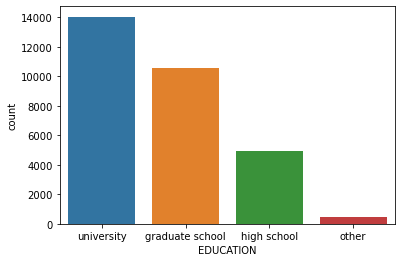

In [32]:
sns.countplot(x=credit2["EDUCATION"])
plt.show()

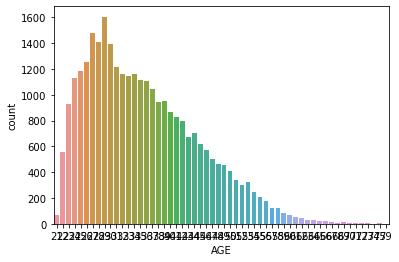

In [43]:
sns.countplot(x=credit2["AGE"])
plt.show()

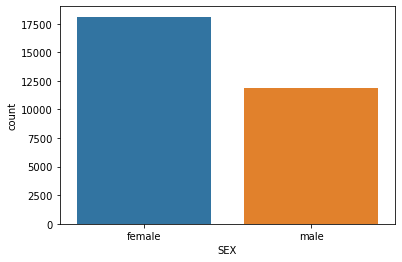

In [36]:
sns.countplot(x=credit2["SEX"])
plt.show()

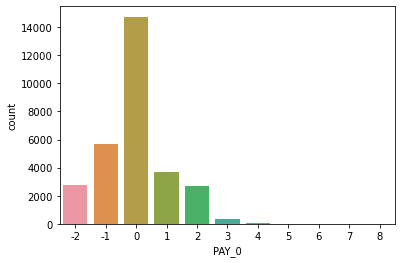

In [37]:
sns.countplot(x=credit2["PAY_0"])
plt.show()

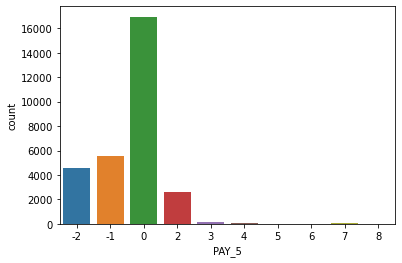

In [38]:
sns.countplot(x=credit2["PAY_5"])
plt.show()

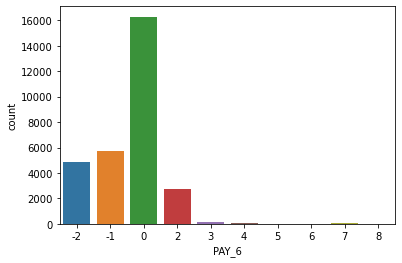

In [40]:
sns.countplot(x=credit2["PAY_6"])
plt.show()

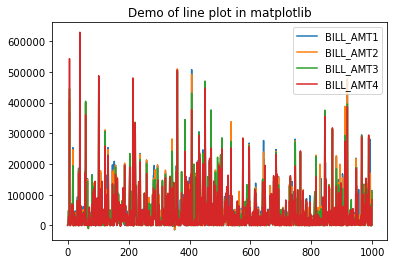

In [15]:
credit2[:1000][['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',]].plot(kind='line')
plt.title('Demo of line plot in matplotlib')
plt.show()

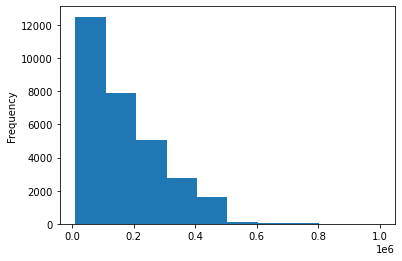

In [16]:
credit.LIMIT_BAL.plot.hist()
plt.show()

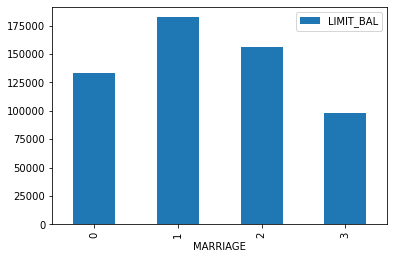

In [17]:
marriage_group = credit[['MARRIAGE', 'LIMIT_BAL']].groupby('MARRIAGE')
marriage_group.mean().plot.bar()
plt.show()

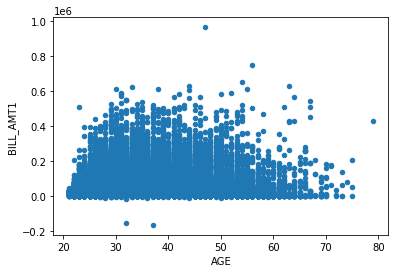

In [18]:
credit.plot(kind='scatter', x='AGE', y='BILL_AMT1')
plt.show()

# Histograms

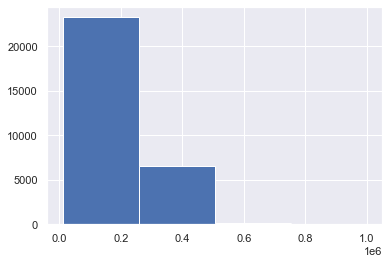

In [53]:
plt.hist(credit2['LIMIT_BAL'], bins=4)
plt.show()

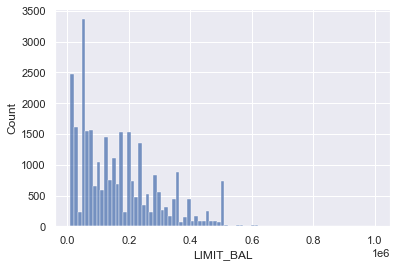

In [54]:
sns.histplot(credit2, x='LIMIT_BAL')
plt.show()

# Scatter Plots

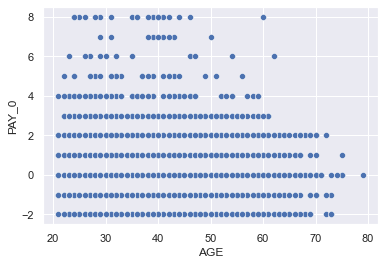

In [87]:
sns.scatterplot(data=credit2, x='AGE', y='PAY_0')
plt.show()

# Box Plot

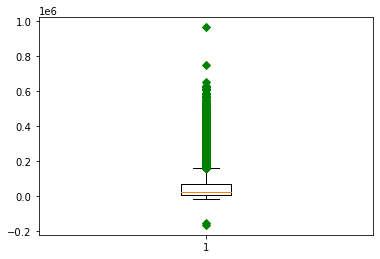

In [31]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

# Correlation

In [27]:
credit2_corr = credit2.corr()
credit2_corr

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.026179,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
MARRIAGE,-0.029079,-0.108139,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.018678,0.144713,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.030575,-0.271214,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.011215,-0.296382,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.018494,-0.286123,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.002735,-0.267460,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.022199,-0.249411,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
PAY_6,-0.020270,-0.235195,0.034345,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,...,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299


# Covariance

In [28]:
credit2_cov = credit2.cov()
credit2_cov

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,7.500250e+07,2.941664e+07,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,-217.860029,-201.877379,...,1.462688e+07,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05
LIMIT_BAL,2.941664e+07,1.683446e+10,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441,...,2.548533e+09,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08
MARRIAGE,-1.314525e+02,-7.323670e+03,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,0.021074,0.020616,...,-9.016791e+02,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01
AGE,1.491057e+03,1.730767e+05,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,-0.562245,-0.517022,...,3.433425e+04,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03
PAY_0,-2.975726e+02,-3.954593e+04,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292,...,1.401156e+04,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03
PAY_2,-1.162770e+02,-4.603765e+04,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320,...,1.860951e+04,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02
PAY_3,-1.916922e+02,-4.443225e+04,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815,...,1.888249e+04,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02
PAY_4,-2.769132e+01,-4.057181e+04,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263,...,1.986300e+04,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02
PAY_5,-2.178600e+02,-3.667056e+04,0.021074,-0.562245,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545,...,1.912266e+04,1.982293e+04,1.858659e+04,1.771569e+04,-1.142817e+02,-8.332449e+01,1.808121e+02,-1.034962e+03,-5.771610e+02,-4.638926e+02
PAY_6,-2.018774e+02,-3.509308e+04,0.020616,-0.517022,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472,...,1.923442e+04,1.970555e+04,2.033812e+04,1.952488e+04,-2.850067e+01,-1.383995e+02,1.181210e+02,3.426237e+02,-8.158327e+02,-5.172163e+02


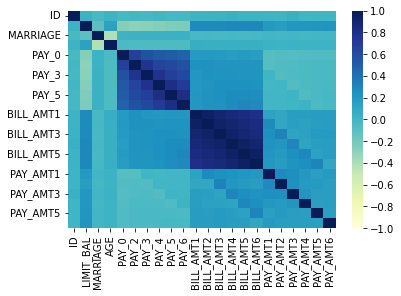

In [29]:
sns.heatmap(
    credit2_corr,
    cmap="YlGnBu",
    cbar_kws={'ticks': [-1.0, -0.8, -0.6, -0.4, -0.2, 0., 0.2, 0.4, 0.6, 0.8, 1.0]},
    vmin=-1,
    vmax=1)
plt.show()

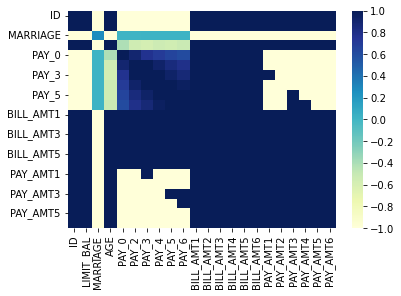

In [30]:
sns.heatmap(
    credit2_cov,
    cmap="YlGnBu",
    cbar_kws={'ticks': [-1.0, -0.8, -0.6, -0.4, -0.2, 0., 0.2, 0.4, 0.6, 0.8, 1.0]},
    vmin=-1,
    vmax=1)
plt.show()